C:\Users\Alden\AppData\Local\Temp\ipykernel_21916\2835944148.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights.append(float(item))


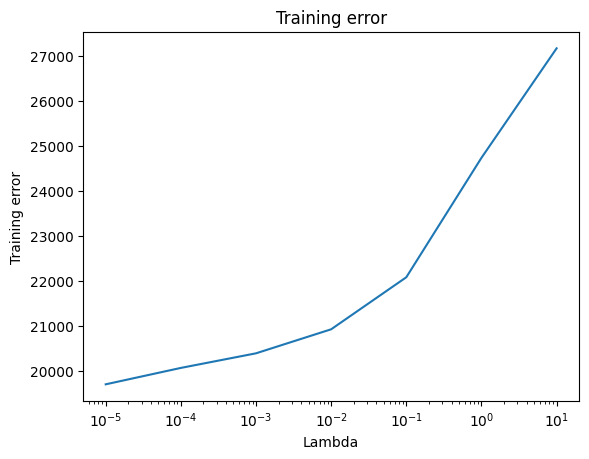

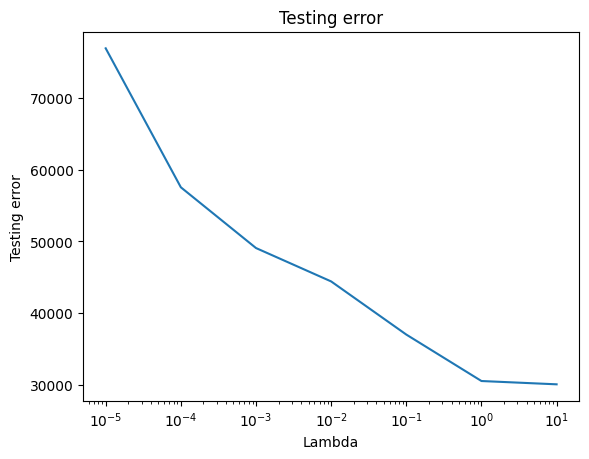

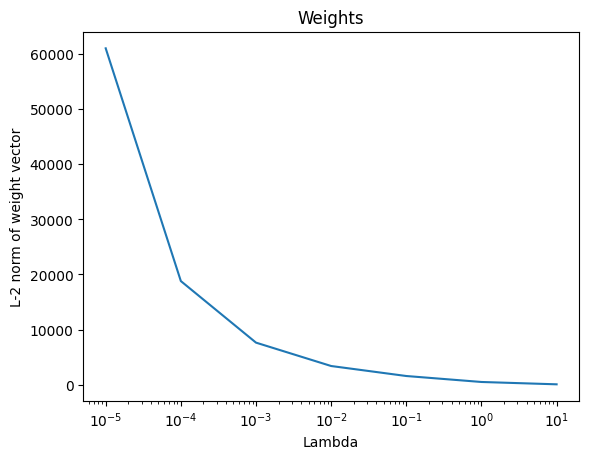

Training error: [19695.354823963666, 20060.116138737925, 20384.664250733877, 20918.86518165216, 22075.715668745594, 24730.739328369953, 27165.12612819299]
Testing error: [76911.07208682552, 57531.76027004541, 49060.59804050351, 44405.139402623994, 36994.6967266464, 30517.773939737766, 30057.30349989966]
L2 norms: [60957.42731559241, 18794.92102474763, 7644.179449987964, 3408.8665326749483, 1597.6750186712156, 516.3293421748878, 92.22727252676054]
Weights ['Weights for lambda = 1e-05:', -344.80496907622296, -381.5594688152746, 491.8186543062418, 156.2905949361575, -9226.34373157355, 8289.847049463075, 2611.5280960971722, -1086.6320162317297, 3786.151981809293, 522.2212179310025, -85.14145712722177, -875.194168053922, -366.0414369598368, 25118.589730042324, 1898.179451269185, 7889.616889067547, 452.94516494688287, 1609.7185036140727, 187.62736528211235, 586.2849207475138, 242.44396128649237, 33.843476927075585, -3296.97683296958, 2375.8902036949876, 2132.68973421774, 122.60879468366329, 

In [4]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# --------------------------------------------------
# Step 1: Ridge Regression Function 
# --------------------------------------------------

# X is the inputs (feature matrix), y is the true answers

def ridge_regression(X, y, lam):
    
# 1A: Compute X^T X

    XT = X.T
    XTX = XT @ X 
  
# 1B Compute λI (identity matrix scaled by lambda)

    # Create identity matrix for X (size 64x64)

    I = np.identity(X.shape[1])

    # Compute lambda times I (since lambda is a scalar)
    lambdaI = lam * I

# 1C Add the two matrices & invert

    XTX_plus_lambdaI = XTX + lambdaI

    # Invert the added matrices

    XTX_plus_lambdaI_inverted = np.linalg.inv(XTX_plus_lambdaI)

    
# 1D Compute X^T y

    XTY = XT @ y

# 1E Compute the final weights using values from 1C and 1D
    
    w =  XTX_plus_lambdaI_inverted @ XTY

    return(w)


# --------------------------------------------------
# Step 2: Train on dataset
# --------------------------------------------------

data = loadmat("diabetes.mat")

# 2A Extract the training and testing data
X_train = data['x_train']
y_train = data['y_train']
X_test  = data['x_test']
y_test  = data['y_test']

# 2B: Define lambda values to test
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

# --------------------------------------------------
# Step 3: Compute error
# --------------------------------------------------

# Prepare lists to store results
training_errors = []
testing_errors = []
weights = []
L2s = []

for lam in lambdas:
    #3A Compute optimal weights
    w = ridge_regression(X_train, y_train, lam)
    weights.append(f'Weights for lambda = {lam}:')
    for item in w:
        weights.append(float(item))

    #3B Predict y for training and testing data (y hat)
    y_train_pred = X_train @ w
    y_test_pred  = X_test @ w

    #3C Compute training and testing error
    train_error = np.mean(np.square(y_train - y_train_pred))
    test_error = np.mean(np.square(y_test - y_test_pred))

    #3D Compute L2 norm
    L2 = np.linalg.norm(w)
        

    #3E Add errors and weights to list (converted from numpy float to python float)
    training_errors.append(float(train_error))
    testing_errors.append(float(test_error))
    L2s.append(float(L2))
    
    

# --------------------------------------------------
# Step 4: Plot
# --------------------------------------------------

# 4A plot training error 
plt.plot(lambdas, training_errors)    

plt.xlabel("Lambda")
plt.xticks(lambdas)
plt.xscale('log')
plt.ylabel("Training error")
plt.title("Training error")

plt.show()

# 4B plot testing error 
plt.plot(lambdas, testing_errors)

plt.xlabel("Lambda")
plt.xticks(lambdas)
plt.xscale('log')
plt.ylabel("Testing error")
plt.title("Testing error")

plt.show()

# 4C plot L2s
plt.plot(lambdas, L2s)

plt.xlabel("Lambda")
plt.xticks(lambdas)
plt.xscale('log')
plt.ylabel("L-2 norm of weight vector")
plt.title("Weights")

plt.show()

print('Training error:', training_errors)
print('Testing error:', testing_errors)
print('L2 norms:', L2s)
print('Weights', weights)